In [71]:
import sklearn
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import json, csv
import math, re
from scipy import sparse, linalg
import itertools
from nltk import bigrams
import nltk
import nlpfun

In [72]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
np.set_printoptions(suppress=True)

In [73]:
example = ["Machine learning is super fun",
"Python is super super cool",
"Statistics is cool too",
"Python is great for machine learning",
"Data science is fun",
"I like football",
"Football is good to watch"]
vectorizer = CountVectorizer(stop_words = 'english', ngram_range=(1,1))
dtm = vectorizer.fit_transform(example)
pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names())

,cool,data,football,fun,good,great,learning,like,machine,python,science,statistics,super,watch
Machine learning is super fun,0,0,0,1,0,0,1,0,1,0,0,0,1,0
Python is super super cool,1,0,0,0,0,0,0,0,0,1,0,0,2,0
Statistics is cool too,1,0,0,0,0,0,0,0,0,0,0,1,0,0
Python is great for machine learning,0,0,0,0,0,1,1,0,1,1,0,0,0,0
Data science is fun,0,1,0,1,0,0,0,0,0,0,1,0,0,0
I like football,0,0,1,0,0,0,0,1,0,0,0,0,0,0
Football is good to watch,0,0,1,0,1,0,0,0,0,0,0,0,0,1


In [74]:
idf = TfidfTransformer()

In [75]:
vected = idf.fit_transform(dtm.toarray().T)

In [76]:
u, s, v = linalg.svd(vected.toarray())

In [77]:
docs = v[0:2,:]

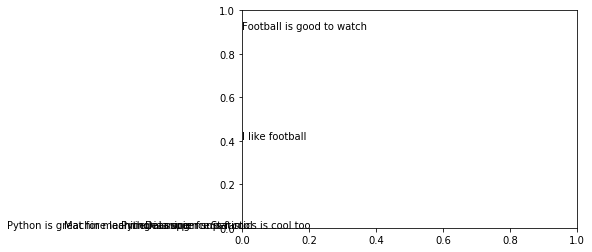

In [78]:
ax = plt.gca()
i = 0
for _ in zip(docs[0,:],docs[1,:]):
    plt.text(_[0], _[1], example[i])
    i += 1

In [79]:
M, I = nlpfun.compute_co_occurrence_matrix([nlpfun.remove_stop(e.lower().split(), vectorizer) for e in example], vectorizer, window_size=4, scan_left=True, scan_right=True, allow_duplicates=False, allow_self=False)

In [80]:
pd.DataFrame(M,index=vectorizer.get_feature_names(),columns=vectorizer.get_feature_names())

,cool,data,football,fun,good,great,learning,like,machine,python,science,statistics,super,watch
cool,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,2.0000,0.0000
data,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
football,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
fun,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000
good,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
great,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000
learning,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,2.0000,1.0000,0.0000,0.0000,1.0000,0.0000
like,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
machine,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,2.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000
python,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,2.0000,0.0000


In [81]:
coo_prob_matrix = nlpfun.create_probability_matrix(M)

In [82]:
np

<module 'numpy' from 'C:\\Users\\MetBook\\Anaconda3\\lib\\site-packages\\numpy\\__init__.py'>

In [83]:
out = pd.DataFrame(coo_prob_matrix,index=vectorizer.get_feature_names(),columns=vectorizer.get_feature_names())
for column in out.columns:
    out[column] = out[column].fillna(0)
out

,cool,data,football,fun,good,great,learning,like,machine,python,science,statistics,super,watch
cool,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0200,0.0000,0.0200,0.0400,0.0000
data,0.0000,0.0000,0.0000,0.0200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0200,0.0000,0.0000,0.0000
football,0.0000,0.0000,0.0000,0.0000,0.0200,0.0000,0.0000,0.0200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0200
fun,0.0000,0.0200,0.0000,0.0000,0.0000,0.0000,0.0200,0.0000,0.0200,0.0000,0.0200,0.0000,0.0200,0.0000
good,0.0000,0.0000,0.0200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0200
great,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0200,0.0000,0.0200,0.0200,0.0000,0.0000,0.0000,0.0000
learning,0.0000,0.0000,0.0000,0.0200,0.0000,0.0200,0.0000,0.0000,0.0400,0.0200,0.0000,0.0000,0.0200,0.0000
like,0.0000,0.0000,0.0200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
machine,0.0000,0.0000,0.0000,0.0200,0.0000,0.0200,0.0400,0.0000,0.0000,0.0200,0.0000,0.0000,0.0200,0.0000
python,0.0200,0.0000,0.0000,0.0000,0.0000,0.0200,0.0200,0.0000,0.0200,0.0000,0.0000,0.0000,0.0400,0.0000


In [84]:
out.sum().sum()

1.0

In [85]:
coo_prob_matrix = nlpfun.create_probability_matrix(M)
# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = NMF(2,beta_loss=1, solver='mu', max_iter=1000)
dtm_lsa = lsa.fit_transform(coo_prob_matrix)

In [86]:
pd.DataFrame(dtm_lsa, index = vectorizer.get_feature_names(), columns = ["component_" + str(i) for i in range(1,lsa.n_components_+1,1)])

,component_1,component_2
cool,0.0239,0.1609
data,0.0478,0.0000
football,0.0000,0.0000
fun,0.0956,0.0536
good,0.0000,0.0000
great,0.0717,0.0000
learning,0.0956,0.1073
like,0.0000,0.0000
machine,0.0956,0.1073
python,0.0717,0.1609


In [87]:
components = np.transpose(dtm_lsa)
components = sklearn.preprocessing.normalize(components, axis=1, norm='l2')

In [88]:
Vxs = [w for w in components[0]]
Vys = [w for w in components[1]]

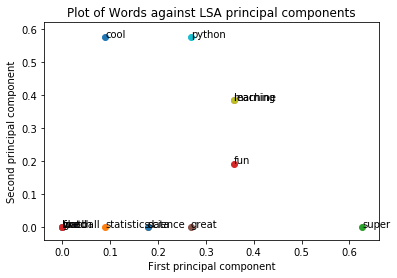

[(0, 'cool'), (1, 'data'), (2, 'football'), (3, 'fun'), (4, 'good'), (5, 'great'), (6, 'learning'), (7, 'like'), (8, 'machine'), (9, 'python'), (10, 'science'), (11, 'statistics'), (12, 'super'), (13, 'watch')]


In [89]:
plt.figure()
ax = plt.gca()
for pos, vec in enumerate(list(zip(Vxs, Vys))[:]):
    ax.scatter(vec[0],vec[1])
    ax.text(vec[0],vec[1],s=vectorizer.get_feature_names()[pos])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of Words against LSA principal components')
plt.show()
print(list(enumerate(vectorizer.get_feature_names())))

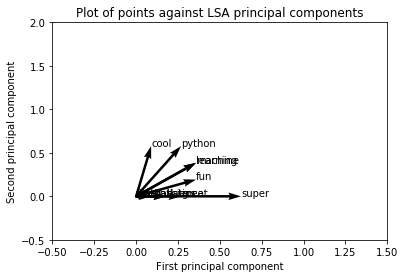

[(0, 'cool'), (1, 'data'), (2, 'football'), (3, 'fun'), (4, 'good'), (5, 'great'), (6, 'learning'), (7, 'like'), (8, 'machine'), (9, 'python'), (10, 'science'), (11, 'statistics'), (12, 'super'), (13, 'watch')]


In [90]:
plt.figure()
ax = plt.gca()
for pos, vec in enumerate(list(zip(Vxs, Vys))[:]):
    ax.quiver(0,0,vec[0],vec[1],angles='xy',scale_units='xy',scale=1, linewidth = .01, norm=True)
    ax.text(vec[0],vec[1],s=vectorizer.get_feature_names()[pos])
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,2])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points against LSA principal components')
plt.draw()
plt.show()
print(list(enumerate(vectorizer.get_feature_names())))

In [91]:
pd.DataFrame(lsa.components_, columns = vectorizer.get_feature_names(), index = ["component_" + str(i) for i in range(1,lsa.n_components_+1,1)])

,cool,data,football,fun,good,great,learning,like,machine,python,science,statistics,super,watch
component_1,0.1080,0.0540,0.0000,0.1350,0.0000,0.0000,0.1620,0.0000,0.1620,0.1620,0.0540,0.0000,0.0000,0.0000
component_2,0.0000,0.0000,0.0000,0.0000,0.0000,0.1017,0.0000,0.0000,0.0000,0.0000,0.0000,0.0339,0.2373,0.0000


In [92]:
components = np.transpose(lsa.components_)
components = sklearn.preprocessing.normalize(components, axis=1, norm='l2')

In [93]:
xs = [w[0] for w in components]
ys = [w[1] for w in components]
xs, ys;

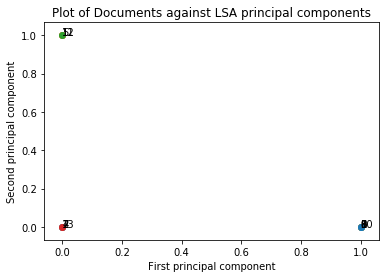

[(0, 'cool'), (1, 'data'), (2, 'football'), (3, 'fun'), (4, 'good'), (5, 'great'), (6, 'learning'), (7, 'like'), (8, 'machine'), (9, 'python'), (10, 'science'), (11, 'statistics'), (12, 'super'), (13, 'watch')]


In [94]:
plt.figure()
ax = plt.gca()
for pos, vec in enumerate(list(zip(xs, ys))[:]):
    ax.scatter(vec[0],vec[1])
    ax.text(vec[0],vec[1],s=pos)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of Documents against LSA principal components')
plt.show()
print(list(enumerate(vectorizer.get_feature_names())))

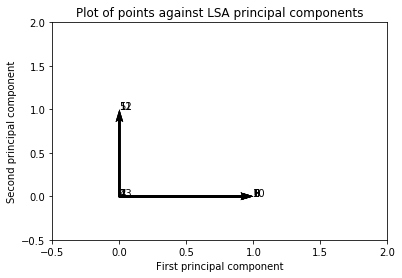

[(0, 'cool'), (1, 'data'), (2, 'football'), (3, 'fun'), (4, 'good'), (5, 'great'), (6, 'learning'), (7, 'like'), (8, 'machine'), (9, 'python'), (10, 'science'), (11, 'statistics'), (12, 'super'), (13, 'watch')]


In [95]:
plt.figure()
ax = plt.gca()
for pos, vec in enumerate(list(zip(xs, ys))[:]):
    ax.quiver(0,0,vec[0],vec[1],angles='xy',scale_units='xy',scale=1, linewidth = .01)
    ax.text(vec[0],vec[1],s=pos)
ax.set_xlim([-.5,2])
ax.set_ylim([-.5,2])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points against LSA principal components')
plt.draw()
plt.show()
print(list(enumerate(vectorizer.get_feature_names())))

In [96]:
#Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(components) * np.asmatrix(components).T)
pd.DataFrame(similarity,index=vectorizer.get_feature_names(), columns=vectorizer.get_feature_names())

,cool,data,football,fun,good,great,learning,like,machine,python,science,statistics,super,watch
cool,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000
data,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000
football,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
fun,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000
good,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
great,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000
learning,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000
like,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
machine,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000
python,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000


In [135]:
nlpfun.create_probability_matrix(dtm.T)

array([[0.        , 0.04545455, 0.04545455, 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.04545455,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.04545455, 0.04545455],
       [0.04545455, 0.        , 0.        , 0.        , 0.04545455,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.04545455],
       [0.        , 0.        , 0.        , 0.04545455, 0.        ,
        0.        , 0.        ],
       [0.04545455, 0.        , 0.        , 0.04545455, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.04545455, 0.        ],
       [0.04545455, 0.        , 0.        , 0.04545455, 0.        ,
        0.        , 0.        ],
       [0.        , 0.04545455, 0.        , 0.04545455, 0.        ,
        0.        , 0. 

In [123]:
coo_prob_matrix = nlpfun.create_probability_matrix(dtm.T)
# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = NMF(2,beta_loss=1, solver='mu', max_iter=1000)
dtm_lsa = lsa.fit_transform(nlpfun.create_probability_matrix(coo_prob_matrix))

In [124]:
pd.DataFrame(dtm_lsa, index = vectorizer.get_feature_names(), columns = ["component_" + str(i) for i in range(1,lsa.n_components_+1,1)])

,component_1,component_2
cool,0.1717,0.0000
data,0.0000,0.0810
football,0.0000,0.0000
fun,0.0000,0.1620
good,0.0000,0.0000
great,0.0000,0.0810
learning,0.0000,0.1620
like,0.0000,0.0000
machine,0.0000,0.1620
python,0.1717,0.0000


In [125]:
components = np.transpose(dtm_lsa)
components = sklearn.preprocessing.normalize(components, axis=1, norm='l2')

In [126]:
Vxs = [w for w in components[0]]
Vys = [w for w in components[1]]

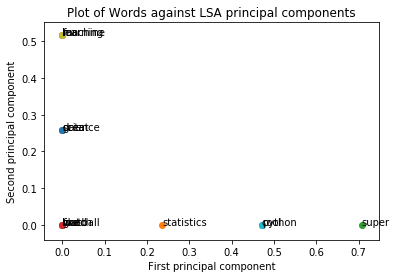

[(0, 'cool'), (1, 'data'), (2, 'football'), (3, 'fun'), (4, 'good'), (5, 'great'), (6, 'learning'), (7, 'like'), (8, 'machine'), (9, 'python'), (10, 'science'), (11, 'statistics'), (12, 'super'), (13, 'watch')]


In [127]:
plt.figure()
ax = plt.gca()
for pos, vec in enumerate(list(zip(Vxs, Vys))[:]):
    ax.scatter(vec[0],vec[1])
    ax.text(vec[0],vec[1],s=vectorizer.get_feature_names()[pos])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of Words against LSA principal components')
plt.show()
print(list(enumerate(vectorizer.get_feature_names())))

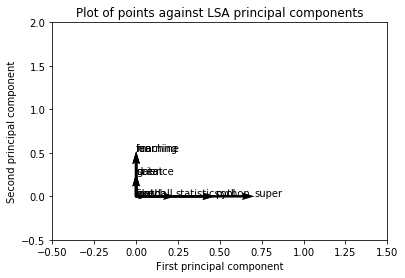

[(0, 'cool'), (1, 'data'), (2, 'football'), (3, 'fun'), (4, 'good'), (5, 'great'), (6, 'learning'), (7, 'like'), (8, 'machine'), (9, 'python'), (10, 'science'), (11, 'statistics'), (12, 'super'), (13, 'watch')]


In [128]:
plt.figure()
ax = plt.gca()
for pos, vec in enumerate(list(zip(Vxs, Vys))[:]):
    ax.quiver(0,0,vec[0],vec[1],angles='xy',scale_units='xy',scale=1, linewidth = .01, norm=True)
    ax.text(vec[0],vec[1],s=vectorizer.get_feature_names()[pos])
ax.set_xlim([-.5,1.5])
ax.set_ylim([-.5,2])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points against LSA principal components')
plt.draw()
plt.show()
print(list(enumerate(vectorizer.get_feature_names())))

In [129]:
pd.DataFrame(lsa.components_, columns = example, index = ["component_" + str(i) for i in range(1,lsa.n_components_+1,1)])

,Machine learning is super fun,Python is super super cool,Statistics is cool too,Python is great for machine learning,Data science is fun,I like football,Football is good to watch
component_1,0.0662,0.2647,0.1324,0.0662,0.0000,0.0000,0.0000
component_2,0.1871,0.0000,0.0000,0.1871,0.1871,0.0000,0.0000


In [130]:

components = np.transpose(lsa.components_)
components = sklearn.preprocessing.normalize(components, axis=1, norm='l2')

In [131]:
xs = [w[0] for w in components]
ys = [w[1] for w in components]
xs, ys;

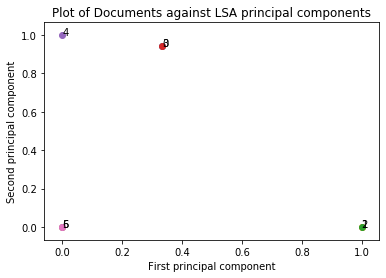

[(0, 'Machine learning is super fun'), (1, 'Python is super super cool'), (2, 'Statistics is cool too'), (3, 'Python is great for machine learning'), (4, 'Data science is fun'), (5, 'I like football'), (6, 'Football is good to watch')]


In [132]:
plt.figure()
ax = plt.gca()
for pos, vec in enumerate(list(zip(xs, ys))[:]):
    ax.scatter(vec[0],vec[1])
    ax.text(vec[0],vec[1],s=pos)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of Documents against LSA principal components')
plt.show()
print(list(enumerate(example)))

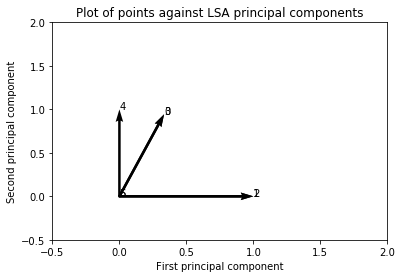

[(0, 'Machine learning is super fun'), (1, 'Python is super super cool'), (2, 'Statistics is cool too'), (3, 'Python is great for machine learning'), (4, 'Data science is fun'), (5, 'I like football'), (6, 'Football is good to watch')]


In [133]:
plt.figure()
ax = plt.gca()
for pos, vec in enumerate(list(zip(xs, ys))[:]):
    ax.quiver(0,0,vec[0],vec[1],angles='xy',scale_units='xy',scale=1, linewidth = .01)
    ax.text(vec[0],vec[1],s=pos)
ax.set_xlim([-.5,2])
ax.set_ylim([-.5,2])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Plot of points against LSA principal components')
plt.draw()
plt.show()
print(list(enumerate(example)))

In [134]:
#Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(components) * np.asmatrix(components).T)
pd.DataFrame(similarity,index=example, columns=example)

,Machine learning is super fun,Python is super super cool,Statistics is cool too,Python is great for machine learning,Data science is fun,I like football,Football is good to watch
Machine learning is super fun,1.0000,0.3335,0.3335,1.0000,0.9428,0.0000,0.0000
Python is super super cool,0.3335,1.0000,1.0000,0.3335,0.0000,0.0000,0.0000
Statistics is cool too,0.3335,1.0000,1.0000,0.3335,0.0000,0.0000,0.0000
Python is great for machine learning,1.0000,0.3335,0.3335,1.0000,0.9428,0.0000,0.0000
Data science is fun,0.9428,0.0000,0.0000,0.9428,1.0000,0.0000,0.0000
I like football,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Football is good to watch,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
